In [1]:
import data.particles_generator as pg
import ROOT
from ROOT import gSystem, gInterpreter
import seaborn
import madx.runner as mr
import pandas as pd
import approximator.runner as ap_runner
import os
import data.bunch_configuration as buc
home = "/home/rafalmucha/Pobrane/optic/"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2016/parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

Welcome to JupyROOT 6.16/00


In [2]:
import sys
import madx.madx_configuration as mc
sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2016/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2016/configuration_reconst_beam1.xml"
item_number = 2
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [3]:
approximator = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [4]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 10e-3
theta_x_mean = 0
sigma_theta_x = 10e-6
y_mean = 0.0
sigma_y = 10e-3
theta_y_mean = 0.00
sigma_theta_y = 10e-6
pt_mean = -0.01
sigma_pt = 0.001

particles_number = 1000

In [5]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, particles_number,
                                                        theta_x_mean, sigma_theta_x, 1,
                                                        y_mean, sigma_y, 1,
                                                        theta_y_mean, sigma_theta_y, 1,
                                                        pt_mean, sigma_pt, 1)

In [6]:
input_positions = pg.generate_particles_randomly(bunch_configuration)

In [7]:
approximator_output = ap_runner.transport(approximator, input_positions)

In [8]:
import numpy as np
madx_input = np.insert(input_positions, 4, 0, axis=1)

In [9]:
madx_output = mr.compute_trajectory(madx_input.T, madx_configuration, 10)

Text(0.5, 1.0, 'Histogram of y at begin')

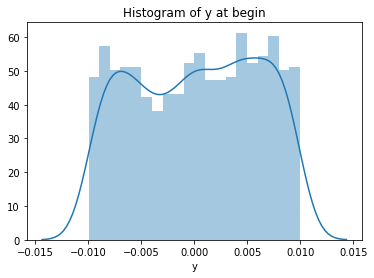

In [22]:
theta_y = pd.Series(input_positions.T[2], name = "y")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of y at begin")

Text(0.5, 1.0, 'Histogram of y at the end, madx transport')

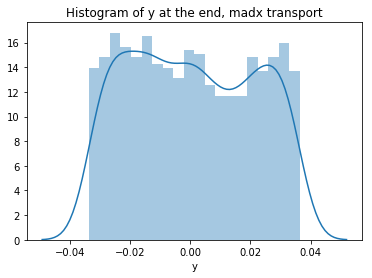

In [23]:
theta_y = pd.Series(madx_output["end"].T[4], name = "y")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of y at the end, madx transport")

Text(0.5, 1.0, 'Histogram of y at the end, \napproximator transport')

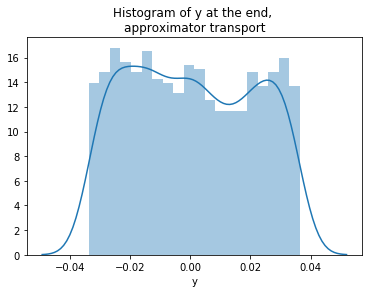

In [24]:
theta_y = pd.Series(approximator_output.T[2], name = "y")
seaborn.distplot(theta_y, bins = 20).set_title("Histogram of y at the end, \napproximator transport")